In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('bread basket.csv')

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction,20507.0,4976.20237,2796.203001,1.0,2552.0,5137.0,7357.0,9684.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


So there is no missing value

Now change the date format

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [7]:
#Count of unique customers
df['Transaction'].nunique()

9465

In [8]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

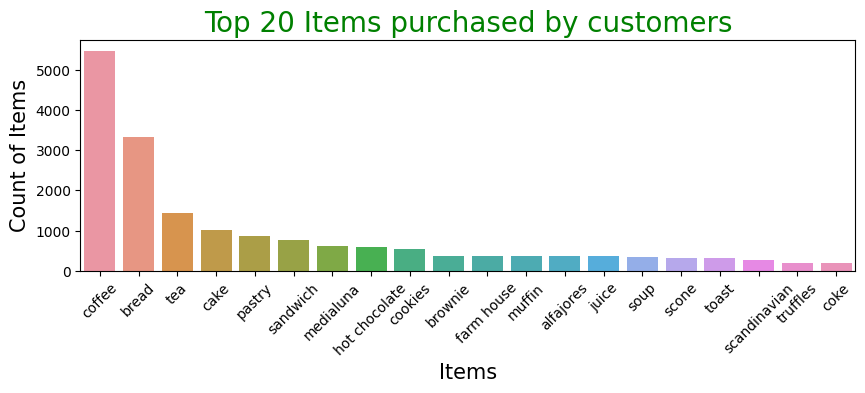

In [9]:
plt.figure(figsize=(10,3))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show();

In [10]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [11]:
# making a mxn matrix where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='count').fillna(0)
my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return False
    if x>=1:
        return True

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori Algorithm

In [13]:
from mlxtend.frequent_patterns import association_rules, apriori

In [14]:
# using the 'apriori algorithm' with min_support=0.01 (.1% of 9465)
frequent_items_apriori = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items_apriori

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(toast, coffee)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(cake, bread, coffee)"
59,0.011199,"(coffee, bread, pastry)"


In [15]:
# now making the rules from frequent itemset generated above & 
#arranging the data from highest to lowest with respect to 'confidence'

rules_apriori = association_rules(frequent_items_apriori, metric = "lift", min_threshold = 1)
rules_apriori_sorted=rules_apriori.sort_values('confidence', ascending=False)
rules_apriori_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


# Selecting and Filtering the Result

In [16]:
frequent_itemset_apriori = apriori(my_basket_sets, min_support = 0.01, use_colnames=True)
frequent_itemset_apriori['length'] = frequent_itemset_apriori['itemsets'].apply(lambda x: len(x))
frequent_itemset_apriori

,support,itemsets,length
0,0.036344,(alfajores),1
1,0.016059,(baguette),1
2,0.327205,(bread),1
3,0.040042,(brownie),1
4,0.103856,(cake),1
...,...,...,...
56,0.023666,"(toast, coffee)",2
57,0.014369,"(tea, sandwich)",2
58,0.010037,"(cake, bread, coffee)",3
59,0.011199,"(coffee, bread, pastry)",3


In [17]:
# getting the item sets with length = 3 and support more han 10%

frequent_itemset_apriori[ (frequent_itemset_apriori['length'] == 3)]

,support,itemsets,length
58,0.010037,"(cake, bread, coffee)",3
59,0.011199,"(coffee, bread, pastry)",3
60,0.010037,"(tea, cake, coffee)",3


In [18]:
# getting the item sets with length = 2 and support more han 10%

frequent_itemset_apriori[ (frequent_itemset_apriori['length'] == 2)]

,support,itemsets,length
30,0.010354,"(alfajores, bread)",2
31,0.019651,"(alfajores, coffee)",2
32,0.010777,"(brownie, bread)",2
33,0.023349,"(cake, bread)",2
34,0.090016,"(bread, coffee)",2
35,0.014474,"(cookies, bread)",2
36,0.013418,"(hot chocolate, bread)",2
37,0.016904,"(medialuna, bread)",2
38,0.029160,"(bread, pastry)",2
39,0.017010,"(bread, sandwich)",2


# fpgrowth Algorithm

In [19]:
from mlxtend.frequent_patterns import fpgrowth

In [20]:
#running the fpgrowth algorithm
frequent_items_fp=fpgrowth(my_basket_sets,min_support=0.01,use_colnames=True)
frequent_items_fp

,support,itemsets
0,0.327205,(bread)
1,0.029054,(scandinavian)
2,0.058320,(hot chocolate)
3,0.054411,(cookies)
4,0.015003,(jam)
...,...,...
56,0.019651,"(brownie, coffee)"
57,0.010777,"(brownie, bread)"
58,0.023666,"(toast, coffee)"
59,0.018067,"(scone, coffee)"


In [21]:
rules_fp=association_rules(frequent_items_fp,metric="lift",min_threshold=1)
rules_fp_sorted=rules_fp.sort_values('confidence', ascending=False)
rules_fp_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
40,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
14,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
9,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
32,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
31,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
18,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
38,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
4,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


# Apriori Vs FP Growth

In [66]:
import time
l=[0.001, 0.003, 0.005, 0.007, 0.009, 0.010, 0.012, 0.014, 0.016, 0.018, 0.020,0.022, 0.024, 0.026, 0.028, 0.030, 0.032, 0.034]
t=[]
for i in l:
    t1=time.time()
    apriori(my_basket_sets,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

In [67]:
l=[0.001, 0.003, 0.005, 0.007, 0.009, 0.010, 0.012, 0.014, 0.016, 0.018, 0.020, 0.022, 0.024, 0.026, 0.028, 0.030, 0.032, 0.034]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(my_basket_sets,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

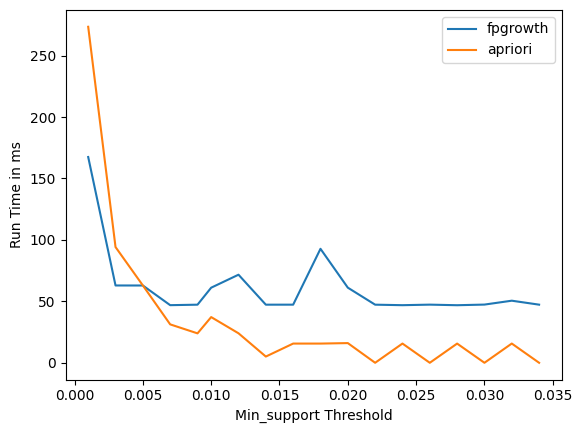

In [68]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms");

We can gain the insights from the above graph about the run time comparision between the apriori and fpgrowth.
Since FP-Growth doesn't require creating candidate sets explicitly, it can be magnitudes faster than the alternative Apriori algorithm. FP-Growth is faster.

# 2nd Dataset Named Groceries

In [25]:
groceries = pd.read_csv("Groceries_dataset.csv")
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [26]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [27]:
groceries.describe().T

,count,mean,std,min,25%,50%,75%,max
Member_number,38765.0,3003.641868,1153.611031,1000.0,2002.0,3005.0,4007.0,5000.0


In [28]:
#Count of unique customers
groceries['Member_number'].nunique()

3898

In [29]:
groceries['itemDescription'] = groceries['itemDescription'].str.strip()
groceries['itemDescription'] = groceries['itemDescription'].str.lower()

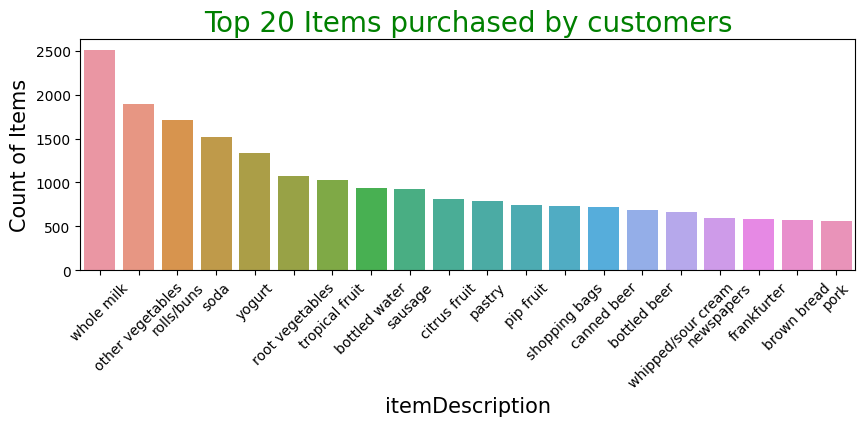

In [30]:
plt.figure(figsize=(10,3))
sns.barplot(x = groceries.itemDescription.value_counts().head(20).index, y = groceries.itemDescription.value_counts().head(20).values)
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show();

In [31]:
# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

In [32]:
len(all_transactions)

14963

Data Preparation

In [33]:
# Look at the 10 first transactions
all_transactions[0:20]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish']]

In [34]:
# The following instructions transform the dataset into the required format for 
#True=the item exists in the transaction
#False means it does not
from mlxtend.preprocessing import TransactionEncoder
trans_encoder = TransactionEncoder()
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)
trans_encoder_matrix = trans_encoder_matrix.astype(bool)

In [35]:
trans_encoder_matrix.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori Algorithm

In [36]:
# Measure time taken to run Apriori algorithm
start_time_a = time.time()
# using the 'apriori algorithm' with min_support=0.001 (.1%)
frequent_items_groceries_apriori = apriori(trans_encoder_matrix, min_support = 0.001,use_colnames = True)
# Calculate time taken
end_time_a = time.time()
time_taken_apriori = end_time_a - start_time_a
print("frequent_items_groceries_apriori:")
print(frequent_items_groceries_apriori)
print("\nTime taken to run Apriori: {:.6f} seconds".format(time_taken_apriori))

frequent_items_groceries_apriori:
      support                           itemsets
0    0.001470                 (abrasive cleaner)
1    0.001938                 (artif. sweetener)
2    0.008087                    (baking powder)
3    0.001136                 (bathroom cleaner)
4    0.033950                             (beef)
..        ...                                ...
745  0.001136  (sausage, whole milk, rolls/buns)
746  0.001002     (whole milk, soda, rolls/buns)
747  0.001337   (yogurt, whole milk, rolls/buns)
748  0.001069        (sausage, whole milk, soda)
749  0.001470      (yogurt, sausage, whole milk)

[750 rows x 2 columns]

Time taken to run Apriori: 1.351543 seconds


In [37]:
# now making the rules from frequent itemset generated above & 
#arranging the data from highest to lowest with respect to 'confidence'

rules_groceries_apriori = association_rules(frequent_items_groceries_apriori, metric = "lift", min_threshold = 1)
rules_sorted_groceries_apriori=rules_groceries_apriori.sort_values('confidence', ascending=False)
rules_sorted_groceries_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
234,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
217,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
229,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,0.122281
201,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
223,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
...,...,...,...,...,...,...,...,...,...,...
111,(whole milk),(detergent),0.157923,0.008621,0.001403,0.008887,1.030824,0.000042,1.000268,0.035510
226,(whole milk),"(yogurt, rolls/buns)",0.157923,0.007819,0.001337,0.008464,1.082428,0.000102,1.000650,0.090433
173,(other vegetables),(pot plants),0.122101,0.007819,0.001002,0.008210,1.049991,0.000048,1.000394,0.054233
220,(whole milk),"(sausage, rolls/buns)",0.157923,0.005347,0.001136,0.007194,1.345594,0.000292,1.001861,0.305000


In [38]:
frequent_itemsets_groceries_apriori = apriori(trans_encoder_matrix, min_support = 0.01, use_colnames=True)
frequent_itemsets_groceries_apriori['length'] = frequent_itemsets_groceries_apriori['itemsets'].apply(lambda x: len(x))
frequent_itemsets_groceries_apriori

,support,itemsets,length
0,0.033950,(beef),1
1,0.021787,(berries),1
2,0.016574,(beverages),1
3,0.045312,(bottled beer),1
4,0.060683,(bottled water),1
...,...,...,...
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(whole milk, soda)",2


In [39]:
# getting the item sets with length = 2 and support more han 10%

frequent_itemsets_groceries_apriori[ (frequent_itemsets_groceries_apriori['length'] == 2)]

,support,itemsets,length
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(whole milk, soda)",2
68,0.011161,"(yogurt, whole milk)",2


# fpgrowth Algorithm


In [40]:
# Measure time taken to run Apriori algorithm
start_time_fp = time.time()
# using the 'fpgrowth algorithm' with min_support=0.001 (.1%)
freq_items_groceries_fp=fpgrowth(trans_encoder_matrix,min_support=0.001,use_colnames=True)
# Calculate time taken
end_time_fp = time.time()
time_taken_fp = end_time_fp - start_time_fp
print("freq_items_groceries applying FPgrowth:")
print(freq_items_groceries_fp)
print("\nTime taken to run fpgrowth: {:.6f} seconds".format(time_taken_fp))

freq_items_groceries applying FPgrowth:
      support                         itemsets
0    0.157923                     (whole milk)
1    0.085879                         (yogurt)
2    0.060349                        (sausage)
3    0.009490            (semi-finished bread)
4    0.051728                         (pastry)
..        ...                              ...
745  0.001403            (chewing gum, yogurt)
746  0.001069  (chewing gum, other vegetables)
747  0.001002              (chewing gum, soda)
748  0.001069              (whole milk, pasta)
749  0.001002  (seasonal products, rolls/buns)

[750 rows x 2 columns]

Time taken to run fpgrowth: 0.144310 seconds


In [41]:
rules_groceries_fp = association_rules(freq_items_groceries_fp, metric = "lift", min_threshold = 1)
rules_sorted_groceries_fp=rules_groceries_fp.sort_values('confidence', ascending=False)
rules_sorted_groceries_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
17,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
23,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,0.122281
29,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
1,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
...,...,...,...,...,...,...,...,...,...,...
101,(whole milk),(detergent),0.157923,0.008621,0.001403,0.008887,1.030824,0.000042,1.000268,0.035510
4,(whole milk),"(yogurt, rolls/buns)",0.157923,0.007819,0.001337,0.008464,1.082428,0.000102,1.000650,0.090433
231,(other vegetables),(pot plants),0.122101,0.007819,0.001002,0.008210,1.049991,0.000048,1.000394,0.054233
20,(whole milk),"(sausage, rolls/buns)",0.157923,0.005347,0.001136,0.007194,1.345594,0.000292,1.001861,0.305000


# Apriori Vs FP Growth

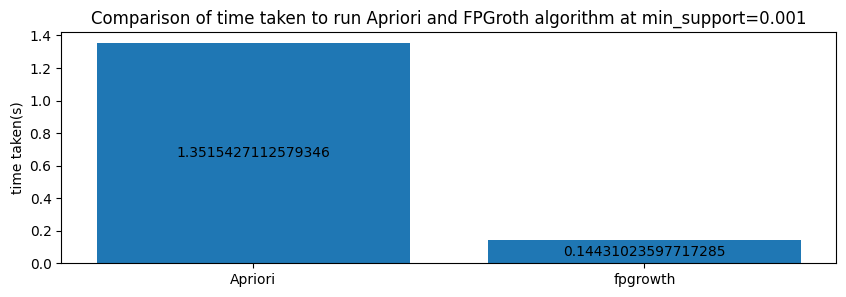

In [85]:
plt.figure(figsize=(10,3))
values = [time_taken_apriori, time_taken_fp]
labels = ['Apriori', 'fpgrowth']
bar_plot=plt.bar(labels, values)
[plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(value), ha='center', va='center') for bar, value in zip(bar_plot, values)]
plt.ylabel('time taken(s)')
plt.title('Comparison of time taken to run Apriori and FPGroth algorithm at min_support=0.001')
plt.show()

In [112]:
k=[.001,.005,.01,.015,.02,.025,.03]
tg=[]
for i in k:
    t1=time.time()
    apriori(trans_encoder_matrix,min_support=i,use_colnames=True)
    t2=time.time()
    tg.append((t2-t1)*1000)

[12.414722442626953,
 2.1790552139282227,
 1.1209654808044434,
 0.6801438331604004,
 0.40758371353149414,
 0.15627622604370117,
 0.3125643730163574]

In [113]:
k=[.001,.005,.01,.015,.02,.025,.03]
fg=[]
for i in k:
    t1=time.time()
    fpgrowth(trans_encoder_matrix,min_support=i,use_colnames=True)
    t2=time.time()
    fg.append((t2-t1)*1000)

[2.5425314903259277,
 1.0981941223144531,
 0.9421825408935547,
 1.7271184921264648,
 1.0473895072937012,
 0.9092354774475098,
 0.8452725410461426]

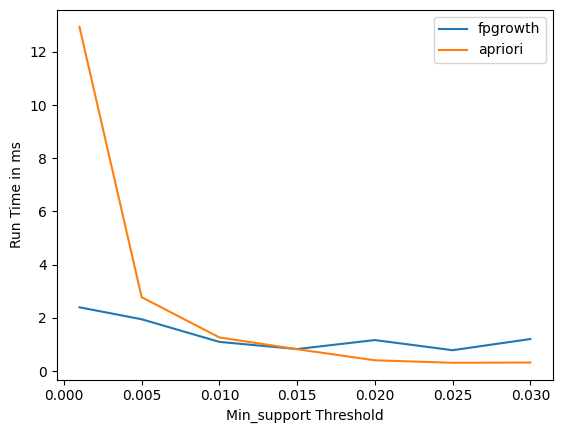

In [111]:
sns.lineplot(x=k,y=fg,label="fpgrowth")
sns.lineplot(x=k,y=tg,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms");